(3, 3, 1000)


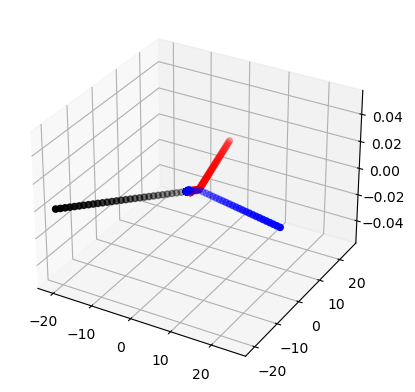

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os as os

# Read the file

path = './'
filename = 'results.txt'


with open(path+filename, 'r') as file:
    n_cols = len(   np.array(file.readline().strip().split()   ).astype(float))
    n_particles = (n_cols-1)//3
    
    times = np.zeros((1000))
    positions = np.zeros((n_particles, 3, 1000))
    
    counter = 0 # Number of lines in the file
    for line in file:
        # Strip whitespace and split by spaces
        data = np.array(line.strip().split()).astype(float)
        times[counter] = data[0]
        for ii in range(n_particles):
            positions[ii, :, counter] = data[(ii*3)+1 : ((ii+1)*3)+1]
        
        counter += 1
        
    times = times[:counter]
    positions = positions[:counter]
    
print(positions.shape)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positions[0, 0, :], positions[0, 1, :], c='k')
ax.scatter(positions[1, 0, :], positions[1, 1, :], c='r')
ax.scatter(positions[2, 0, :], positions[2, 1, :], c='b')